<a href="https://colab.research.google.com/github/dreamer561/DataScience/blob/main/capstonProject911_calls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
df=pd.read_csv(r'/content/drive/MyDrive/911.csv')

In [3]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df['zip'].value_counts().head()


19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [7]:
df.info

<bound method DataFrame.info of              lat        lng  \
0      40.297876 -75.581294   
1      40.258061 -75.264680   
2      40.121182 -75.351975   
3      40.116153 -75.343513   
4      40.251492 -75.603350   
...          ...        ...   
99487  40.132869 -75.333515   
99488  40.006974 -75.289080   
99489  40.115429 -75.334679   
99490  40.186431 -75.192555   
99491  40.207055 -75.317952   

                                                    desc      zip  \
0      REINDEER CT & DEAD END;  NEW HANOVER; Station ...  19525.0   
1      BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...  19446.0   
2      HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...  19401.0   
3      AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...  19401.0   
4      CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...      NaN   
...                                                  ...      ...   
99487  MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...  19401.0   
99488  LANCASTER AVE & RITTENHOUSE PL; LOWE

In [8]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [9]:
df['twp'].value_counts().head()



LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [10]:
df['title'].nunique()

110

### In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.                         For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS ###

In [11]:
extract = lambda x: x.split(':')[0]

df = df.assign(Reason = df['title'].apply(extract))

In [12]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

# Seaborn


In [13]:
import seaborn as sns

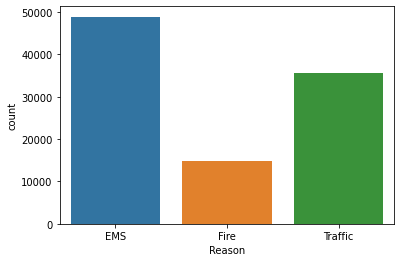

In [14]:
sns.countplot(x='Reason',data=df)

In [15]:
print(type(df['timeStamp'][0]))

<class 'str'>


In [16]:
df["timestamp"]=pd.to_datetime(df['timeStamp'])

In [17]:
print(type(df['timeStamp'][0]))

<class 'str'>


In [58]:
time=df['timeStamp'].iloc[0]
time.hour()

TypeError: ignored

In [22]:
#map function
def addition(n):
  return n+n

numbers=(1,2,3,4)
result=map(addition,numbers)
print(list(result))

[2, 4, 6, 8]


In [24]:
type(df['timeStamp'].iloc[0])

str

In [25]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [26]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [28]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [29]:
df['Hour'] = df['timeStamp'].apply(lambda time:time.hour)
df['Month'] = df['timeStamp'].apply(lambda time:time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time:time.dayofweek)

In [31]:
df.sample()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,timestamp,Hour,Month,Day of Week
76970,40.152193,-75.398453,RIDGE PIKE & ELM AVE; LOWER PROVIDENCE; 2016-0...,19403.0,Traffic: DISABLED VEHICLE -,2016-06-27 18:56:01,LOWER PROVIDENCE,RIDGE PIKE & ELM AVE,1,Traffic,2016-06-27 18:56:01,18,6,0


In [32]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

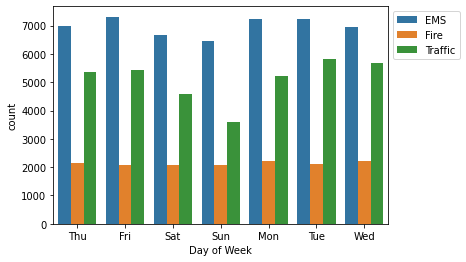

In [35]:
sns.countplot(x='Day of Week', hue='Reason', data=df)
plt.legend(bbox_to_anchor=(1,1))#for days of week

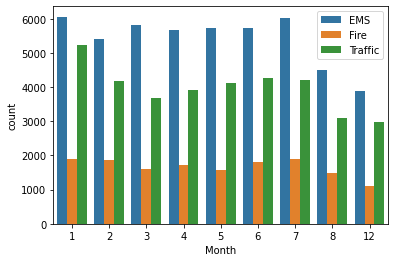

In [37]:
sns.countplot(x='Month', hue='Reason', data=df)
plt.legend(bbox_to_anchor=(1,1))#for months

In [38]:
byMonth = df.groupby(by='Month').count()

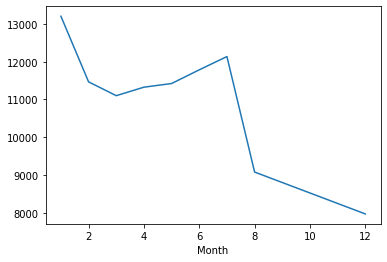

In [40]:
byMonth['lat'].plot()

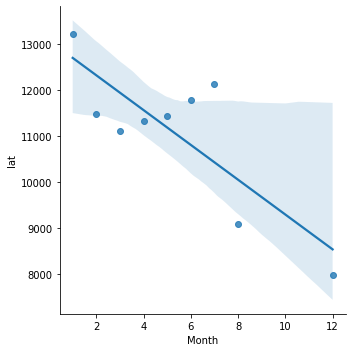

In [59]:
sns.lmplot(x='Month', y='lat', data=byMonth)

In [60]:
df['Date'] = df['timeStamp'].apply(lambda time:time.date())

In [46]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,timestamp,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 17:40:00,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 17:40:01,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 17:40:01,17,12,Thu,2015-12-10


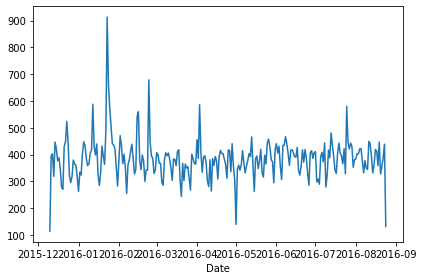

In [47]:
df.groupby(by='Date').count()['lat'].plot()
plt.tight_layout()

Text(0.5, 1.0, 'Traffic')

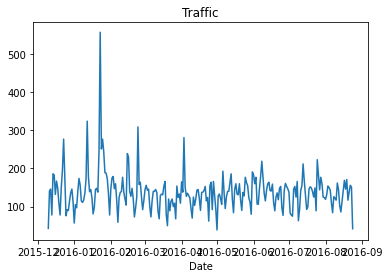

In [48]:
df[df['Reason']=='Traffic'].groupby(by='Date').count()['lat'].plot()
plt.title('Traffic')

Text(0.5, 1.0, 'Fire')

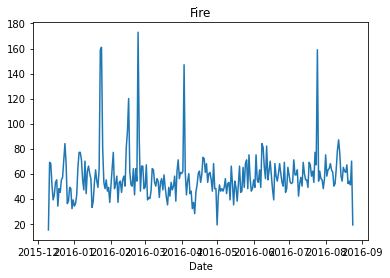

In [49]:
df[df['Reason']=='Fire'].groupby(by='Date').count()['lat'].plot()
plt.title('Fire')

Text(0.5, 1.0, 'EMS')

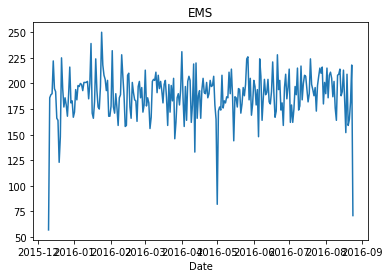

In [50]:
df[df['Reason']=='EMS'].groupby(by='Date').count()['lat'].plot()
plt.title('EMS')

In [66]:
dfGrid = df.groupby(by=['Day of Week','Hour']).count()['lat'].unstack()
dfGrid = dfGrid.loc[['Fri','Mon','Sat','Sun','Thu']]
dfGrid

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


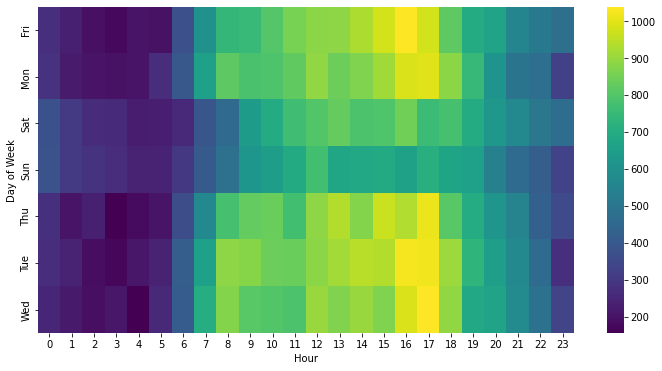

In [62]:
plt.figure(figsize=(12,6))
sns.heatmap(dfGrid, cmap='viridis')

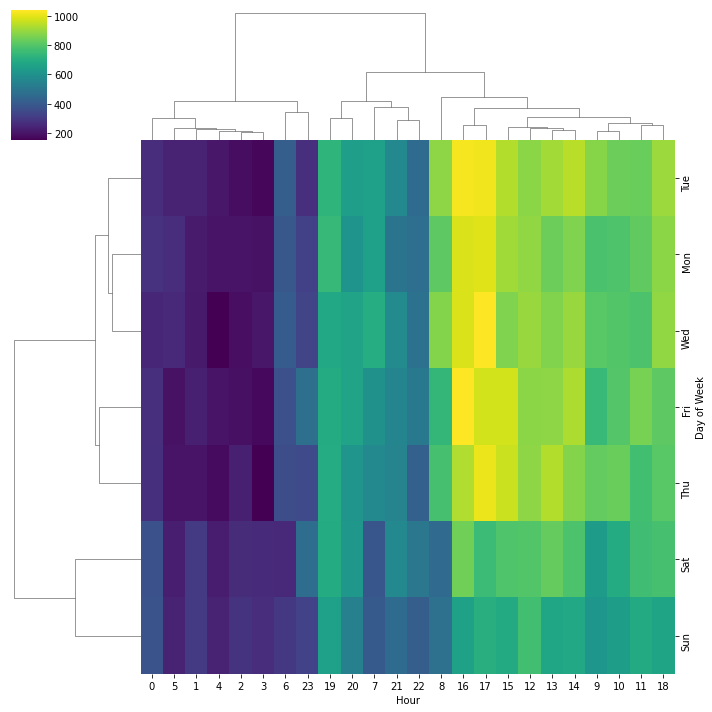

In [63]:
sns.clustermap(dfGrid, cmap='viridis')

In [68]:
dfMonth = df.groupby(['Day of Week','Month']).count()['lat'].unstack()
dfMonth = dfMonth.loc[['Fri','Mon','Sat','Sun','Thu','Tue','Wed']]
dfMonth

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


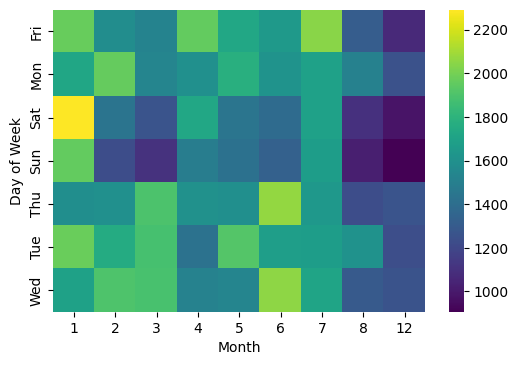

In [69]:
plt.figure(dpi=100)
sns.heatmap(dfMonth, cmap='viridis')

<Figure size 600x400 with 0 Axes>

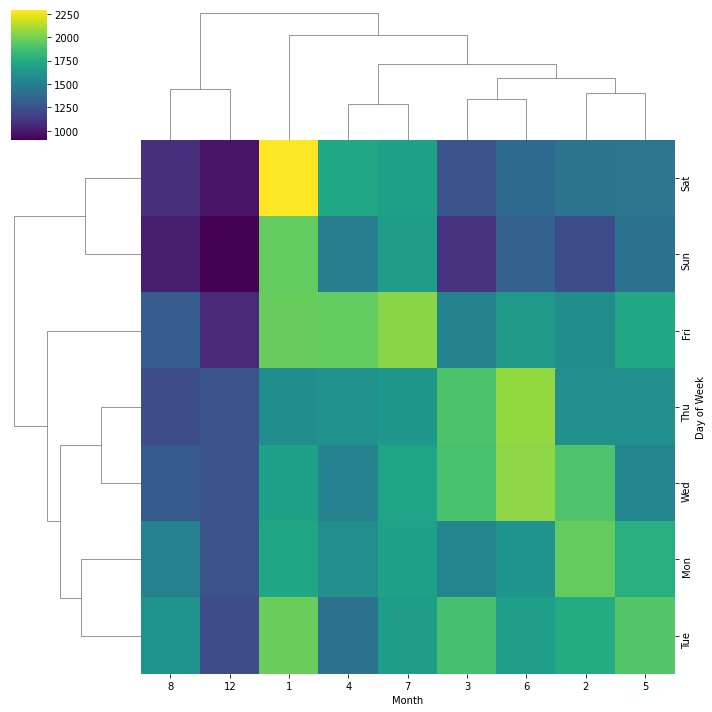

In [70]:
plt.figure(dpi=100)
sns.clustermap(dfMonth, cmap='viridis')